# Аналитика в авиакомпании

Вам нужно провести анализ, по выгруженным 3-м таблицам. Найти наиболее популярные модели самолетов и выбрать топ-10 городов по количеству рейсов, построить по ним графики и выявить закономерности. Это позволит сделать ставку на потенциально популярный рейсы и спланировать рекламные кампании.

### Описание данных:

База данных об авиаперевозках:

Таблица из запроса 1
- model — модель самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

Таблица из запроса 3
- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

Таблица из запроса 5
- week_number — номер недели;
- ticket_amount — количество проданных билетов за неделю;
- festival_week — есть ли на этой неделе фестиваль;
- festival_name — название фестиваля.

### Шаг 1. Откройте файл с данными и изучите общую информацию.

In [1]:
import pandas as pd

# <Проверка гипотез>
from scipy import stats as st

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv', sep=',')
query_3 = pd.read_csv('/datasets/query_3.csv', sep=',')
query_5 = pd.read_csv('/datasets/query_last.csv', sep=',')

Получим общую информацию о данных:

In [3]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
query_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [6]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [7]:
query_3.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [8]:
query_5

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


### Вывод

Таблицы содержат исторические данные о количестве рейсов по городам и моделям самолетов. Пустые значения не будем обрабатывать, т.к. они нам не потребуются для дальнейшего анализа.

### Шаг 2. Анализ данных

Найдем наиболее популярные модели самолетов, построив график количества рейсов по моделям самолета.

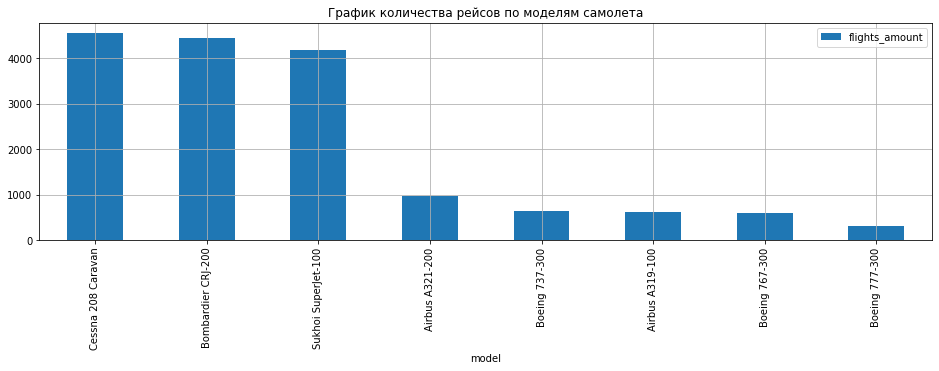

In [9]:
# Строим график количества рейсов по моделям самолета
plot_one = query_1.sort_values(by = 'flights_amount', ascending = False)
plot_one.plot(x='model', grid=True, kind='bar', figsize=(16, 4), title='График количества рейсов по моделям самолета')

Основную часть всех  рейсов выполняется на 3-х моделях самолетов : Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Доля их рейсов равняется примерно 82% от всех рейсов. Это объясняется тем, что это менее вместительные самолеты, они совершают полеты малой и средней дальности.

Построим график количества рейсов по основным городам.

In [10]:
# Найдем количество рейсов из третьего запроса и удалим столбец со средним кол-ом рейсов
query_3['flights_amount'] = query_3['average_flights'] * 31
query_3['flights_amount'] = query_3['flights_amount'].astype('int', errors = 'ignore')
del query_3['average_flights']

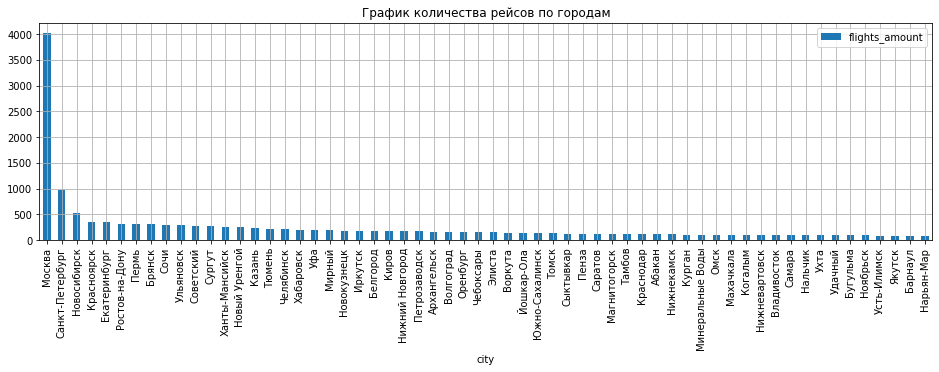

In [11]:
# Построим график количества рейсов по основным городам
plot_two = query_3.sort_values(by='flights_amount', ascending=False).head(60)
plot_two.plot(x='city', grid=True, kind='bar', figsize=(16, 4), title='График количества рейсов по городам')

Как и ожидалось, большая часть рейсов совершается в городах миллиониках - Москва, Санкт-Петербург. Далее идут города со средним и малым количеством полетов.

Построим график ТОП 10 городов по количеству рейсов

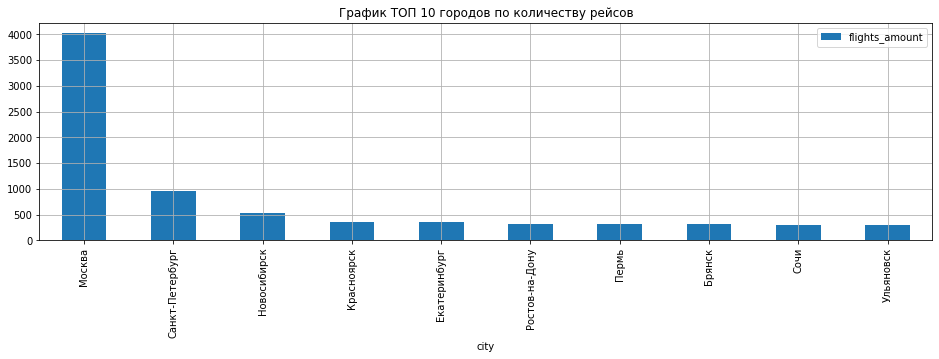

In [12]:
# Построим график ТОП 10 городов по количеству рейсов
plot_three = plot_two.sort_values(by='flights_amount', ascending=False).head(10)
plot_three.plot(x='city', grid=True, kind='bar', figsize=(16, 4), title='График ТОП 10 городов по количеству рейсов')

Первая тройка - Москва, Санкт-Петербург и Новосибирск.

### Шаг 3. Проверка гипотез

Проверим гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Нулевая гипотеза: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».  
Альтернативная гипотеза: «Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время».

In [13]:
festival_time = query_5.query('festival_week == festival_week')['ticket_amount']
not_festival =  query_5.query('festival_week != festival_week')['ticket_amount']

alpha = .05 # критический уровень статистической значимости, если pvalue окажется меньше него, отвергнем гипотезу.

results = st.ttest_ind(
    festival_time, 
    not_festival,
    nan_policy ='omit'
)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


Для проверки гипотез использовали двусторонний тест, т.к. в задании вопрос формулировался, как отличаются конкретные величины и нет разницы в формулировке в задании между гипотезами.

### Вывод

По проверенной гипотезе можно сделать вывод, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. Вероятность получить одинаковые значения мала.

### Шаг 4. Общий вывод

- Основную часть всех  рейсов выполняется на 3-х моделях самолетов : Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100;
- Первая тройка городов по количеству рейсов - Москва, Санкт-Петербург и Новосибирск.
- Cредний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. 

Для увеличение прибыли стоит присмотреться к полученным выводам и планировать будущие рекламные компании в соответствии с ними.